# Hoja de Trabajo 7. TensorFlow
- Mark Albrand - 21004
- Jimena Hernández - 21199

## Importar las librerías relevantes

In [633]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.losses import Huber

## 1. Optimización de Hiperparámetros

In [634]:

observaciones = 1000

x1 = np.random.uniform(low = -10, high = 10, size = (observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1)) 

X = np.column_stack((x1,x2))



In [635]:
ruido = np.random.uniform(-1, 1, (observaciones,1))

y = 2 * x1 - 3 * x2 + 5 + ruido

In [636]:
np.savez('Datos_TF', entradas = X, targets = y)  # nótese que se puede usar cualquier nombre

In [637]:
# Se cargan los datos desde el archivo NPZ.  Por supuesto, esto no era necesario acá
datos = np.load('Datos_TF.npz')

In [638]:
tamanio_entrada = 2

tamanio_salida = 1

In [639]:
modelo = tf.keras.Sequential([
                           
                            tf.keras.layers.Dense(tamanio_salida,
                                                 kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                                                 bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1)
                                                 )
                            ])

In [640]:
optimizador_adhoc = tf.keras.optimizers.SGD(learning_rate = 0.001)
#optimizador_adhoc = tf.keras.optimizers.legacy.SGD(learning_rate = 0.02) # para las MAC con M1 o M2

In [641]:
huber_loss = tf.keras.losses.Huber()

**"compile"** es donde se pueden indicar los optimizadores y la pérdida.

In [642]:
modelo.compile(optimizer = optimizador_adhoc, loss='mean_squared_error', metrics = ['mae'])

In [643]:
import time
start_time = time.time()
modelo.fit(datos['entradas'], datos['targets'], epochs = 100, verbose = 0)

print("--- %s seconds ---" % (time.time() - start_time))


--- 2.309711217880249 seconds ---


In [644]:
resultados = modelo.evaluate(datos['entradas'], datos['targets'])
print(f"Test Loss: {resultados[0]}")
for i, metric in enumerate(modelo.metrics_names[1:]):
    print(f"Test {metric.capitalize()}: {resultados[i+1]}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.0000e+00 - loss: 0.3423
Test Loss: 0.3434355556964874
Test Compile_metrics: 0.0


In [645]:
modelo.layers[0].get_weights()    # el cero (0) es porque solo tenemos una capa

[array([[ 2.0006518],
        [-2.996565 ]], dtype=float32),
 array([4.972242], dtype=float32)]

In [646]:
pesos = modelo.layers[0].get_weights()[0]
pesos

array([[ 2.0006518],
       [-2.996565 ]], dtype=float32)

In [647]:

sesgos = modelo.layers[0].get_weights()[1]
sesgos

array([4.972242], dtype=float32)

In [648]:
modelo.predict_on_batch(datos['entradas']).round(1)[:5, :]

array([[ -6.7],
       [  7.4],
       [-12.8],
       [  7. ],
       [ 11.7]], dtype=float32)

In [649]:
datos['targets'].round(1)[:5, :]

array([[ -7.5],
       [  7.9],
       [-12.5],
       [  7.9],
       [ 11.9]])

## Graficar los datos

El modelo está ya optimizado, por lo que las salidas se han calculado sobre la última forma, o el último estado, del modelo.

Es necesario comprimir o empacar **"squeeze"** los arreglos para dejarlos en un formato que es el esperado por la función graficadora.  No cambia nada ya que se dejaron dimensiones de tamaño 1 - solo es un tecnisismo

### Con matplotlib

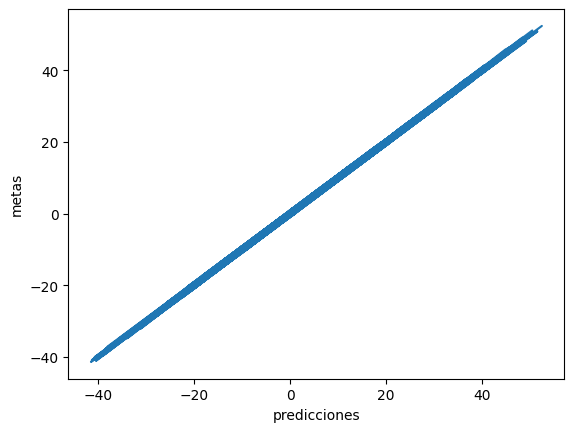

In [650]:
plt.plot(np.squeeze(modelo.predict_on_batch(datos['entradas'])), 
         np.squeeze(datos['targets']))
plt.xlabel('predicciones')
plt.ylabel('metas')
plt.show()

### Con Plotly Express

In [651]:
fig = px.scatter(x = np.squeeze(modelo.predict_on_batch(datos['entradas'])), 
                 y =  np.squeeze(datos['targets']))

fig.update_layout(
    title = "Comparación predicciones vrs metas",
    xaxis_title = "Predicciones",
    yaxis_title = "Metas",
    width = 600,
    height = 400,)

fig.show()